In [31]:
## Import other needed package for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Chapter 1
## **I. Data Processing**

In [32]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No
5,Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
6,No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
7,No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
8,No,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No
9,No,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No


In [3]:
df = df.drop_duplicates()

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,56747.000000,56747.000000,56747.000000,56746.000000
mean,28.058035,3.639752,4.027297,7.127551
std,6.314360,8.208911,8.051042,1.527005
min,12.130000,0.000000,0.000000,1.000000
25%,23.730000,0.000000,0.000000,6.000000
50%,27.120000,0.000000,0.000000,7.000000
75%,31.180000,2.000000,4.000000,8.000000
max,87.050000,30.000000,30.000000,24.000000


- Ideal **BMI** should be from **18.5 to 24.9**, the max count at 94.85 means that individual is extremely obese and unhealthy status.  
- **SleepTime** looks fine with the average time is **7 to 8** hours each day

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56747 entries, 0 to 57396
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      56747 non-null  object 
 1   BMI               56747 non-null  float64
 2   Smoking           56747 non-null  object 
 3   AlcoholDrinking   56747 non-null  object 
 4   Stroke            56747 non-null  object 
 5   PhysicalHealth    56747 non-null  int64  
 6   MentalHealth      56747 non-null  int64  
 7   DiffWalking       56747 non-null  object 
 8   Sex               56747 non-null  object 
 9   AgeCategory       56747 non-null  object 
 10  Race              56747 non-null  object 
 11  Diabetic          56746 non-null  object 
 12  PhysicalActivity  56746 non-null  object 
 13  GenHealth         56746 non-null  object 
 14  SleepTime         56746 non-null  float64
 15  Asthma            56746 non-null  object 
 16  KidneyDisease     56746 non-null  object

From the info above, we have:
- 319.795 observations, 17 attributes (4 numerical, 13 categorical)
- No null values found
- There are many values 0 in 2 columns *PhysicalHealth* and *MentalHealth*

## **II. Data analysis**



In [6]:
no_hd = df['HeartDisease'].value_counts().iloc[0] #count the values of people with no HD
yes_hd = df['HeartDisease'].value_counts().iloc[1] #count the values of people with HD

total = len(df)
# Checking the distribution of people with and without HD
yes_percentage = round((yes_hd / total) * 100, 2)
no_percentage = round((no_hd / total) * 100, 2)

print(f"The number of people with Heart Disease is {yes_hd} ({yes_percentage}% of the total)")
print(f"The number of people without Heart Disease is {no_hd} ({no_percentage}% of the total)")


The number of people with Heart Disease is 5127 (9.03% of the total)
The number of people without Heart Disease is 51620 (90.97% of the total)


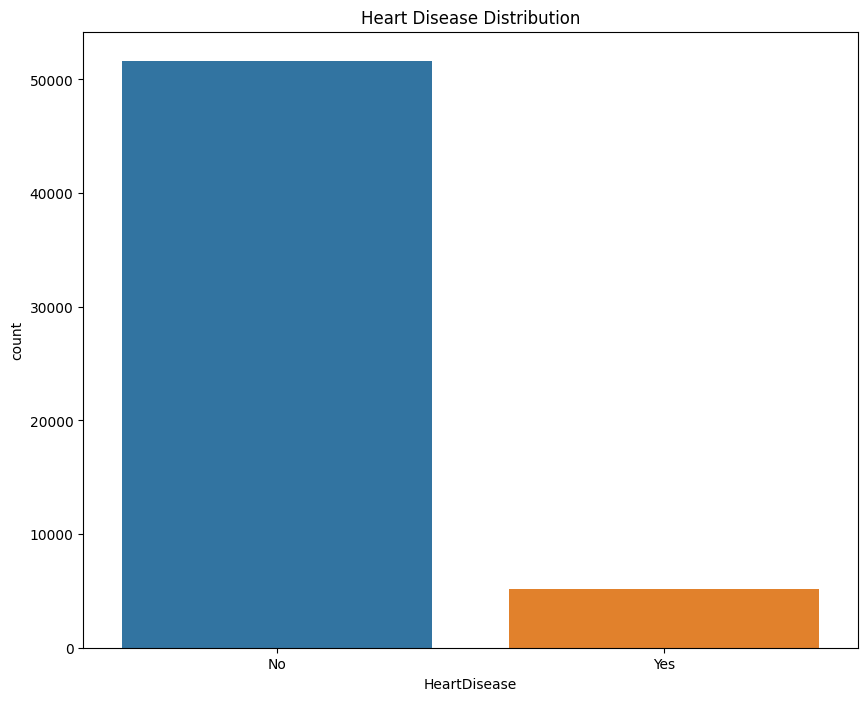

In [7]:
## Visualise the distribution of people with heart disease in this dataset
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='HeartDisease', order=df['HeartDisease'].value_counts().index) ##Use countplot since neither of the variables is numerical
plt.title('Heart Disease Distribution')
plt.show()

We can see that there are more people who don't have heart disease than the people who do in the data.


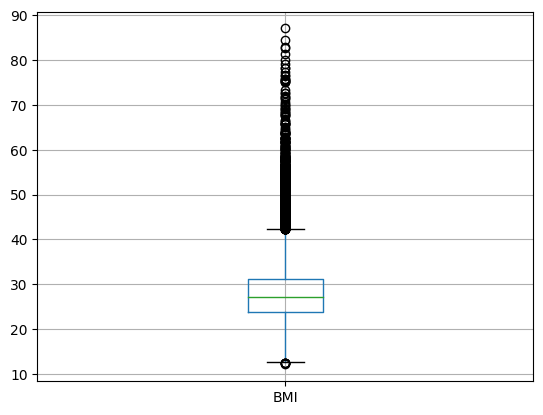

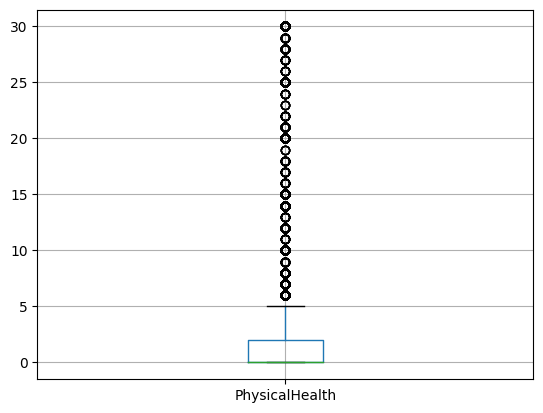

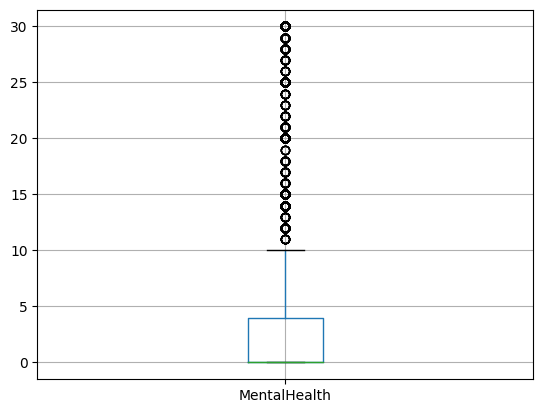

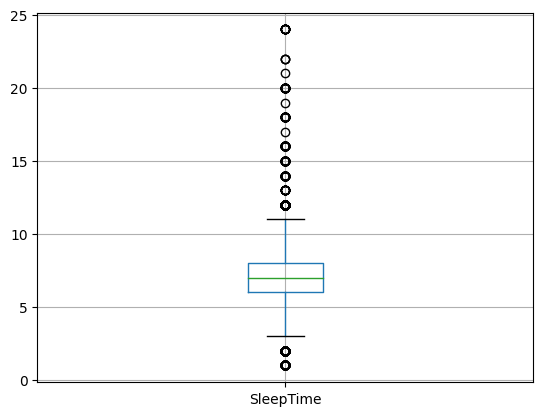

In [8]:
## Let see how the numerical variables distribute
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    df.boxplot([column])

- There are outliers in *SleepTime, BMI*



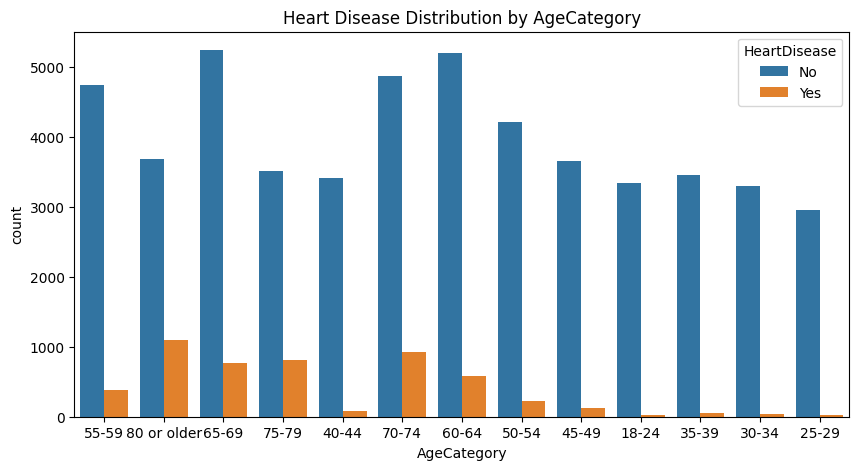

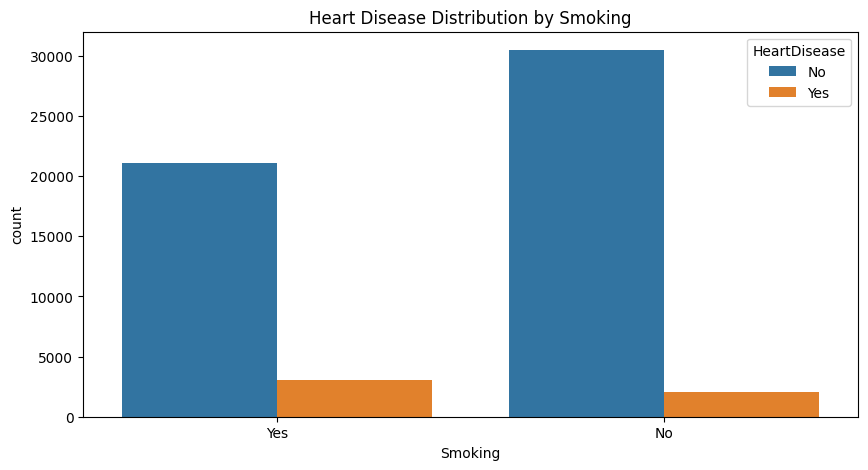

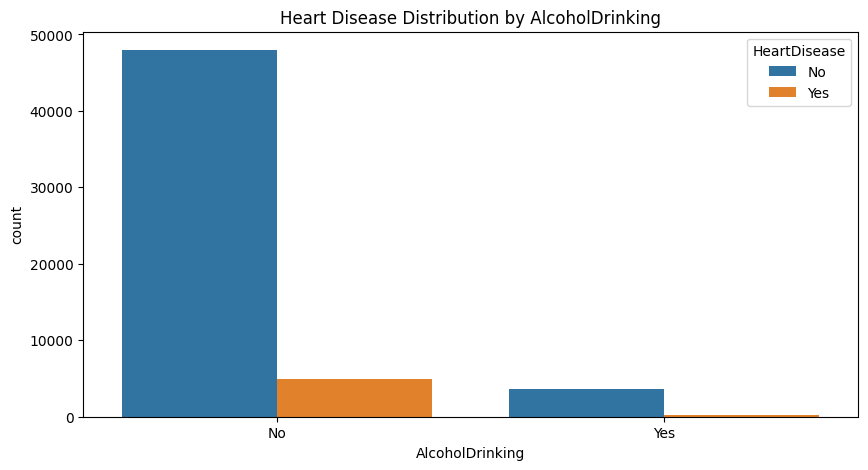

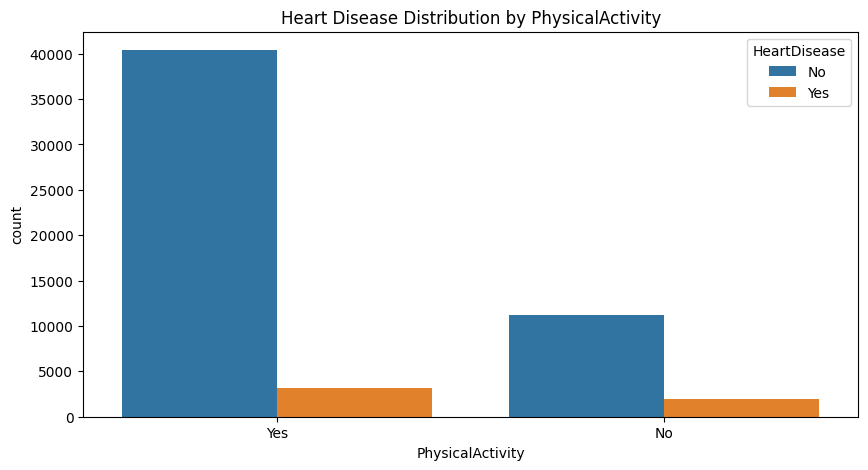

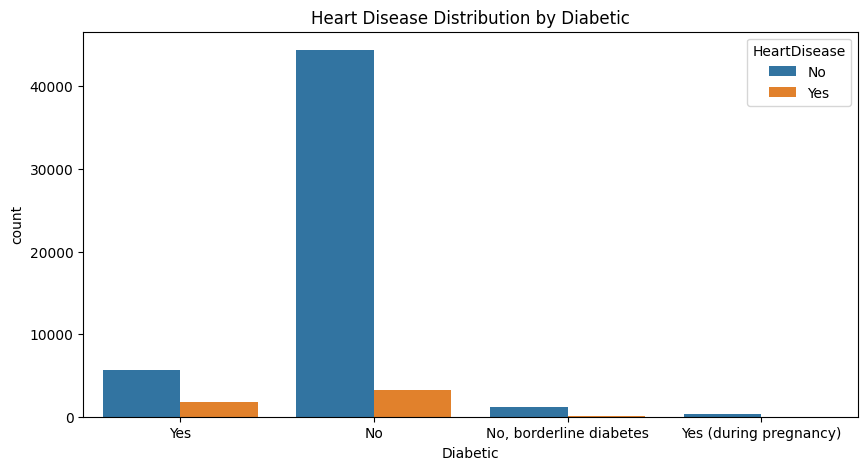

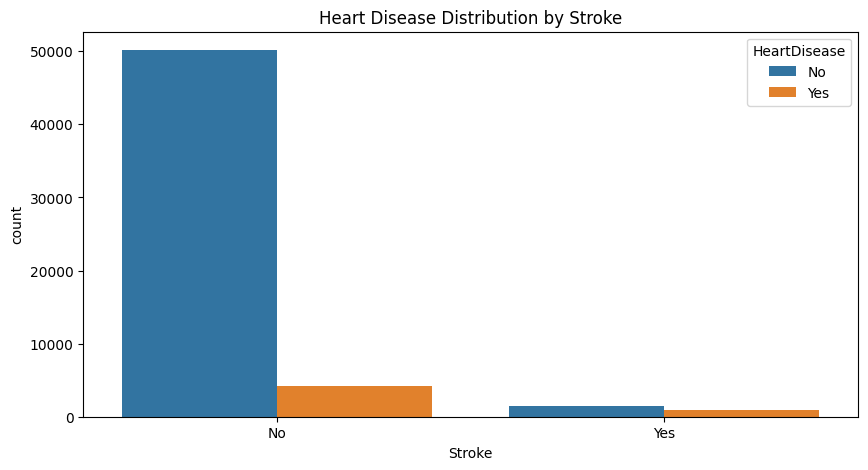

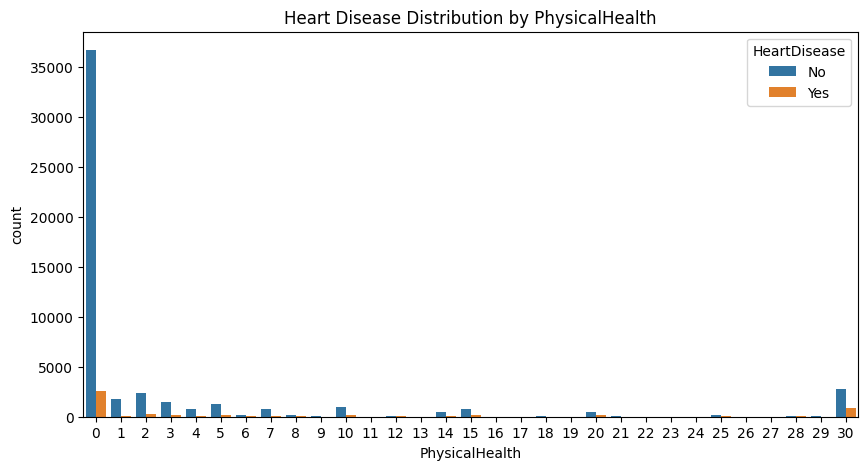

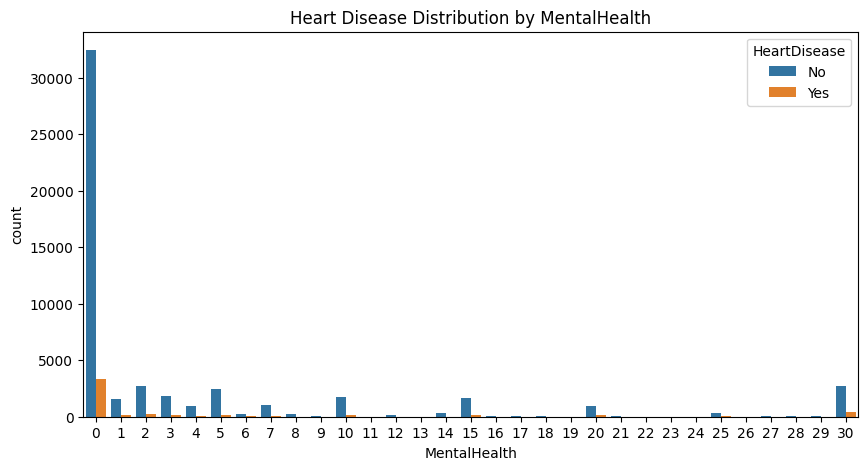

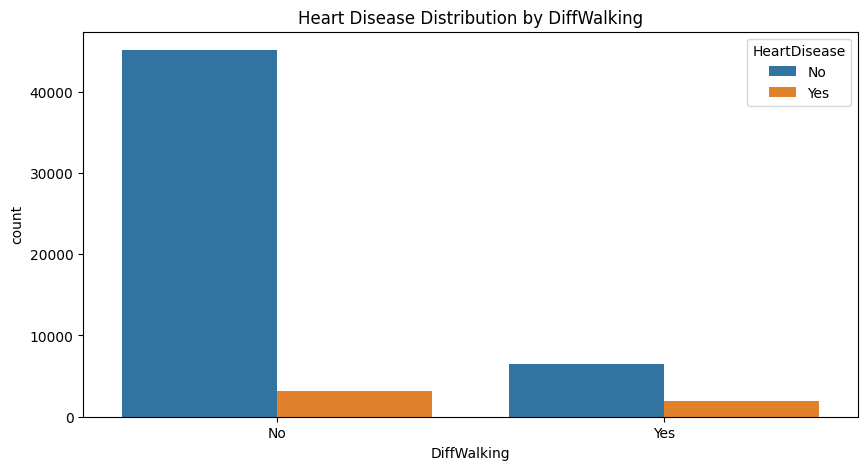

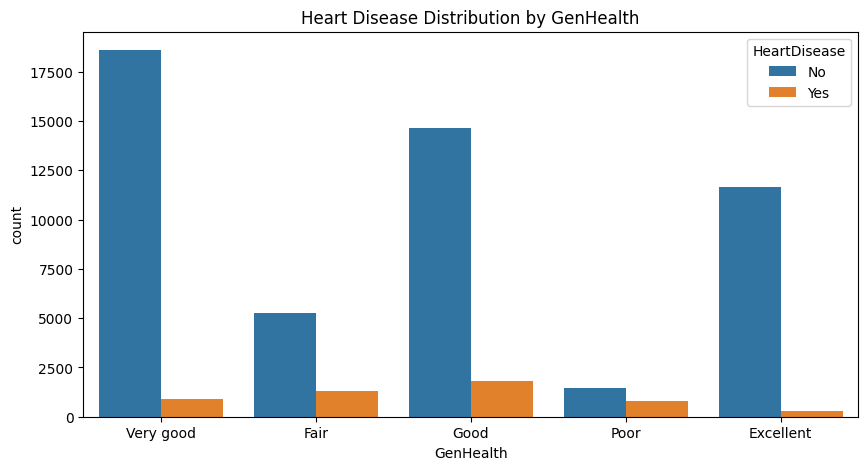

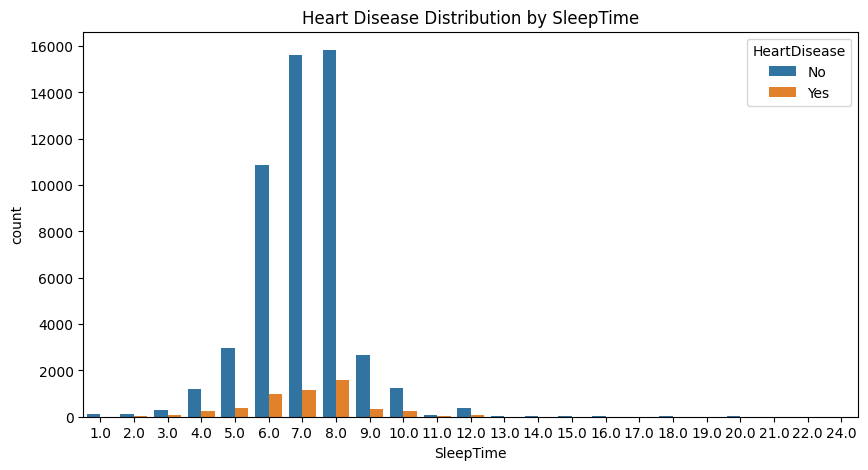

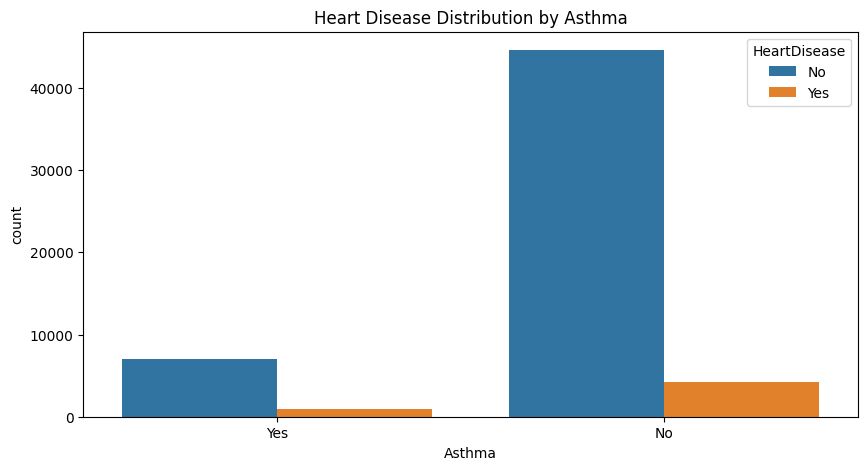

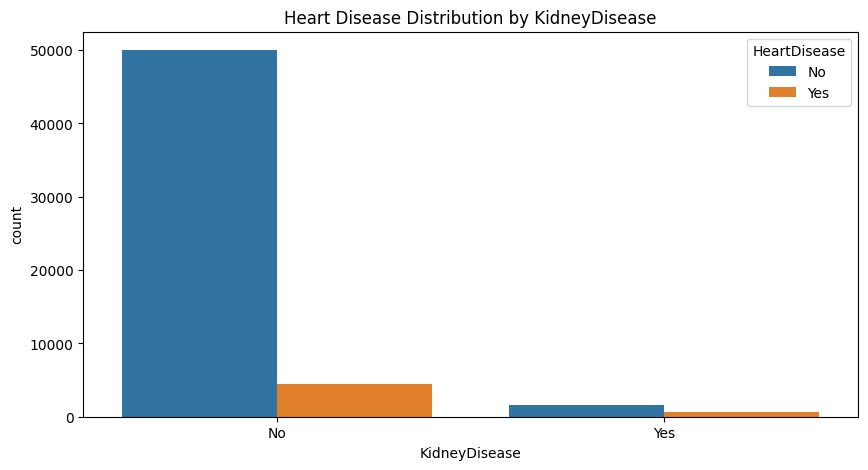

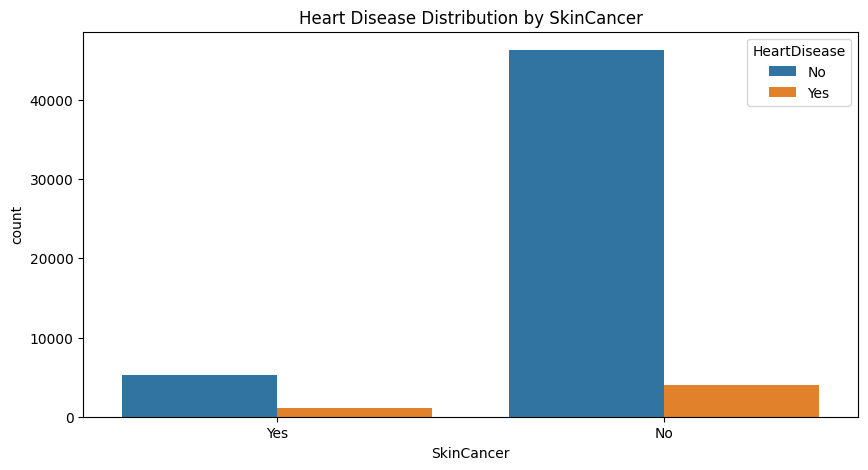

In [9]:
## What about the categorical variables?
categorical_columns = ['AgeCategory', 'Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'Diabetic', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

for column in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=column, hue='HeartDisease', data=df)
    plt.title(f'Heart Disease Distribution by {column}')
    plt.xticks(rotation='horizontal')
    plt.show()

In [10]:
## calculate heart disease percentages
def calculate_heart_disease_percentages(df, column):
    heart_disease_counts = df[df['HeartDisease'] == 'Yes'][column].value_counts()
    no_heart_disease_counts = df[df['HeartDisease'] == 'No'][column].value_counts()
    total_counts = heart_disease_counts.add(no_heart_disease_counts, fill_value=0)
    heart_disease_percentages = (heart_disease_counts / total_counts) * 100
    return heart_disease_percentages

## Perform the analysis for each categorical variable
for column in categorical_columns:
    percentages = calculate_heart_disease_percentages(df, column)
    print(f'\n{column}:')
    print(percentages)



AgeCategory:
18-24           0.682088
25-29           0.604433
30-34           1.166268
35-39           1.511694
40-44           2.404121
45-49           3.350923
50-54           5.200360
55-59           7.353228
60-64          10.095073
65-69          12.726668
70-74          15.942778
75-79          18.651529
80 or older    22.928870
Name: AgeCategory, dtype: float64

Smoking:
No      6.341748
Yes    12.660740
Name: Smoking, dtype: float64

AlcoholDrinking:
No     9.250218
Yes    6.120359
Name: AlcoholDrinking, dtype: float64

PhysicalActivity:
Yes     7.381258
No     14.532846
Name: PhysicalActivity, dtype: float64

Diabetic:
No                          6.793364
Yes                        23.385901
No, borderline diabetes    10.582822
Yes (during pregnancy)      4.714640
Name: Diabetic, dtype: float64

Stroke:
No      7.811064
Yes    37.526744
Name: Stroke, dtype: float64

PhysicalHealth:
0      6.436553
1      6.485912
2      8.878856
3     11.609337
4      9.568261
5     12.76005

In [11]:
from scipy.stats import chi2_contingency

for column in categorical_columns:
    contingency_table = pd.crosstab(df['HeartDisease'], df[column])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'\nColumn: {column}')
    print(f'Chi-square Statistic: {chi2}, P-value: {p}')


Column: AgeCategory
Chi-square Statistic: 3523.0683461771628, P-value: 0.0

Column: Smoking
Chi-square Statistic: 673.4711343328837, P-value: 1.756869098327012e-148

Column: AlcoholDrinking
Chi-square Statistic: 42.96225812504263, P-value: 5.5806136259441145e-11

Column: PhysicalActivity
Chi-square Statistic: 626.8889122548467, P-value: 2.373870654256481e-138

Column: Diabetic
Chi-square Statistic: 2163.19780520947, P-value: 0.0

Column: Stroke
Chi-square Statistic: 2403.9082067721074, P-value: 0.0

Column: PhysicalHealth
Chi-square Statistic: 1948.1488019424423, P-value: 0.0

Column: MentalHealth
Chi-square Statistic: 209.09442757979622, P-value: 9.714101570277866e-29

Column: DiffWalking
Chi-square Statistic: 2420.5953447391803, P-value: 0.0

Column: GenHealth
Chi-square Statistic: 4042.3066668019574, P-value: 0.0

Column: SleepTime
Chi-square Statistic: 457.15182558802707, P-value: 6.034233304508623e-83

Column: Asthma
Chi-square Statistic: 51.24373135387583, P-value: 8.15808317111

In [12]:
from scipy.stats import ttest_ind

# Check the correlation between BMI and Heart Disease
group1 = df[df['HeartDisease'] == 'Yes']['BMI']
group2 = df[df['HeartDisease'] == 'No']['BMI']
t_statistic, p_value = ttest_ind(group1, group2)
print(f"T-test statistic: {t_statistic}, P-value: {p_value}")


T-test statistic: 11.71960453058251, P-value: 1.1002620995359972e-31


## Temporary Assumption
- The people over 50 are more likely to have CVD
- Drinking habit, asthma, kidney disease and diabetic do not indicate a threatening correlation as it is seen that people who don't have these diseases still have a high chance of getting CVD
- People who have difficulty walking are more likely to have heart diseases
- People who have a good GenHealth and high frequency in PhysicalActivity are less likely to have CVD
- People have had history of stroke and smoking can highly have heart diseases
- Most the participants in this dataset are White and do not have diabetes.


## **III. Feature Analysis**

***a. Does BMI affect heart disease?***

<Axes: xlabel='BMI', ylabel='HeartDisease'>

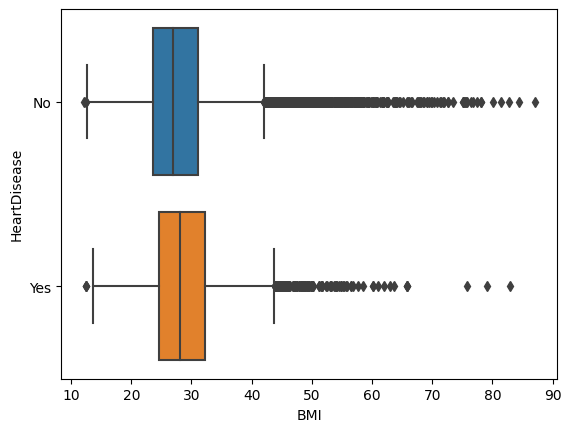

In [13]:
sns.boxplot(df, x="BMI", y='HeartDisease')

- The people who have heart diseases have a hight BMI number than normal people.
- Overall, the distribution is normal and it seems that the BMI doesn't affect heart disease.


---






***b. Between male and female, who is more vulnerable to heart diseases? And is it true that the risk is much higher the more a person ages?***


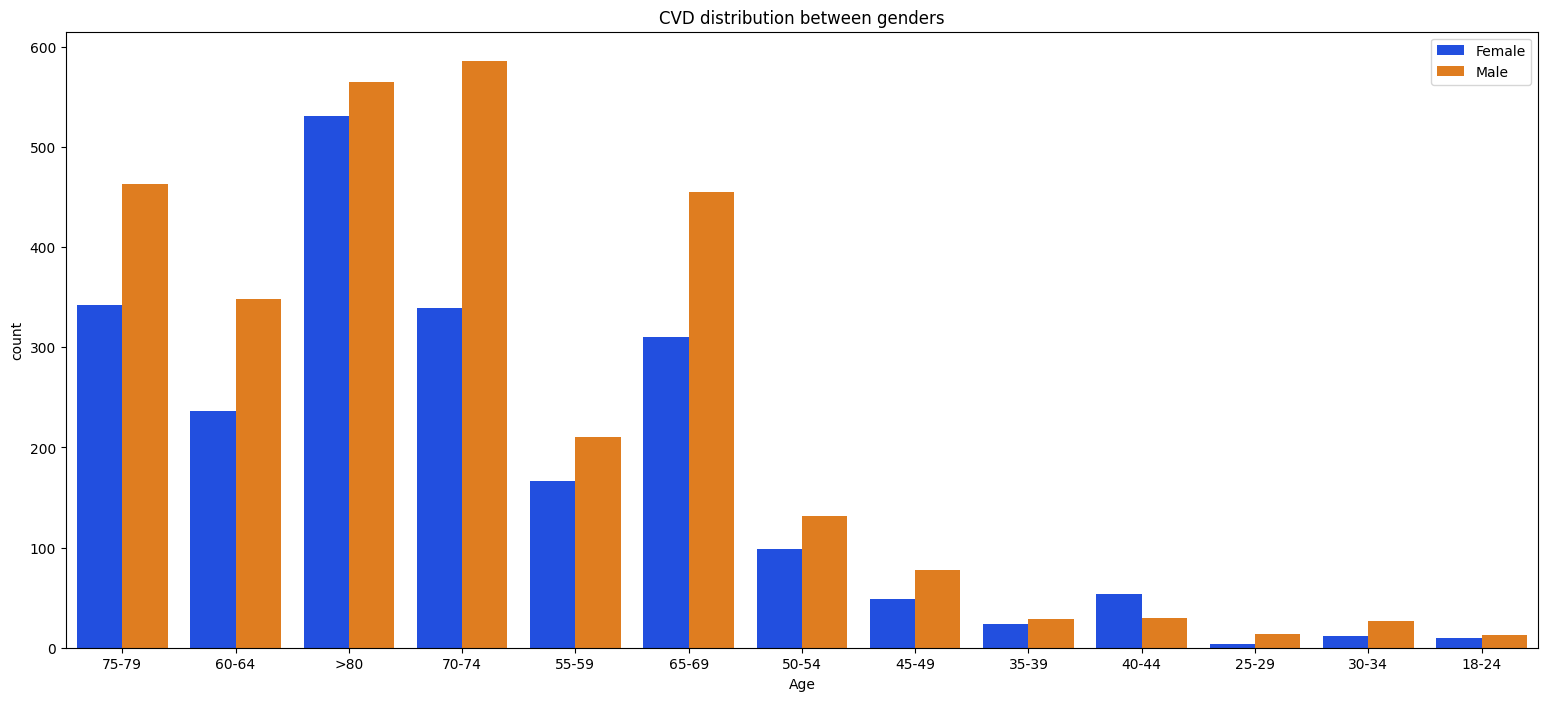

In [14]:
df.loc[df.AgeCategory=='80 or older','AgeCategory'] = '>80'
order_by = pd.unique(df.AgeCategory.values).sort()
plt.figure(figsize = (19,8))
sns.countplot(data=df[df['HeartDisease']=='Yes'], x='AgeCategory', hue='Sex', palette='bright', order=order_by)
plt.title('CVD distribution between genders')
plt.xlabel('Age')
plt.legend(['Female','Male'])
plt.show()

- As a person ages, the more risks of getting heart diseases increase
- In general, males percentage of having heart diseases is significantly higher than females.


---



***c. Is the percentage of peole suffering from heart diseases the same in all races?***

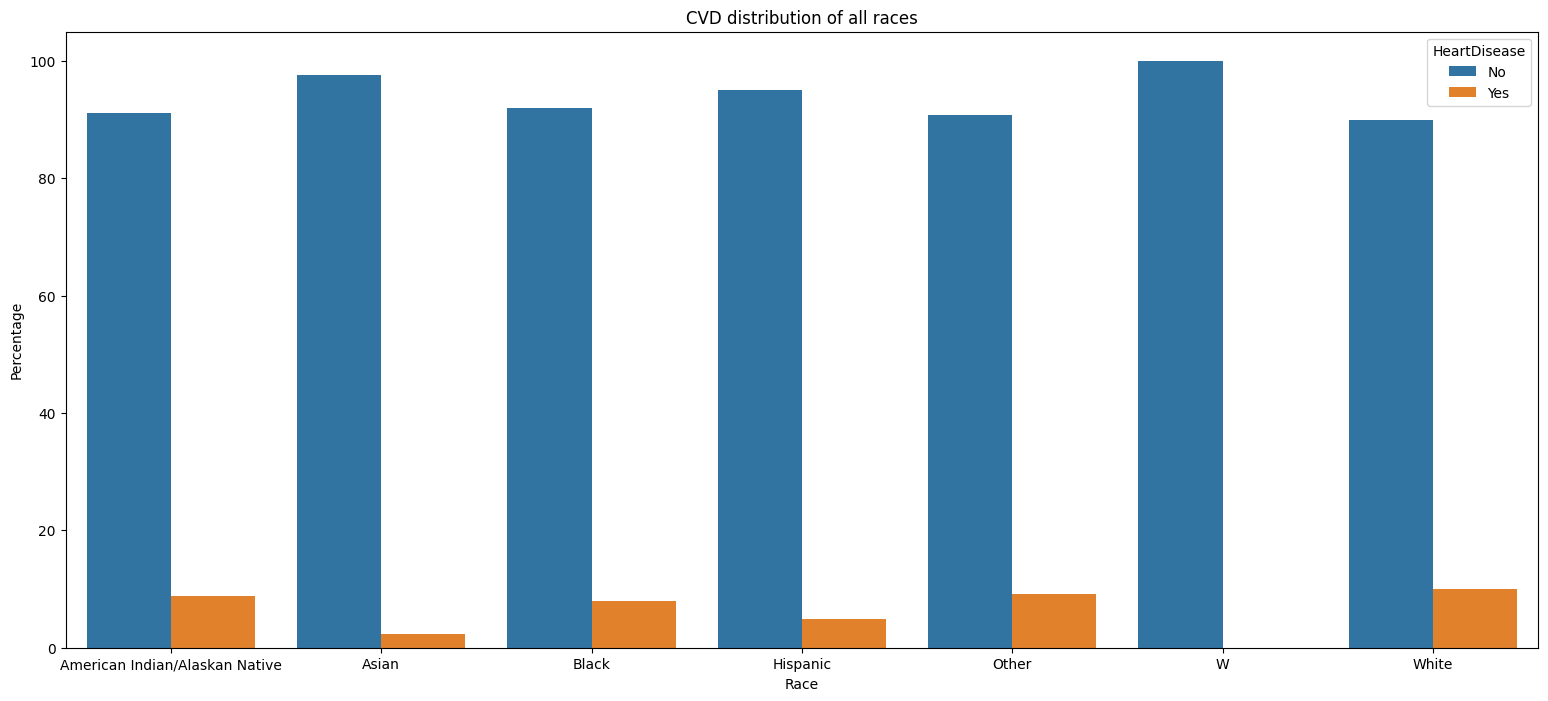

In [15]:
df_plot = df.groupby('Race')['HeartDisease'].value_counts(normalize=True).mul(100)
df_plot = df_plot.rename('count').reset_index()

fig, ax = plt.subplots(1, 1, figsize=(19, 8))
sns.barplot(x='Race', y='count', hue='HeartDisease', data=df_plot, ax=ax)
ax.set_title('CVD distribution of all races')
ax.set_xlabel('Race')
ax.set_ylabel('Percentage')
plt.show()

- White, American Indian/Alaskan Native, Black and Other races have much more cases of CVD
- Asian people are the least prone to heart diseases.

***d. What about other parameters and their relationship with heart disease?***

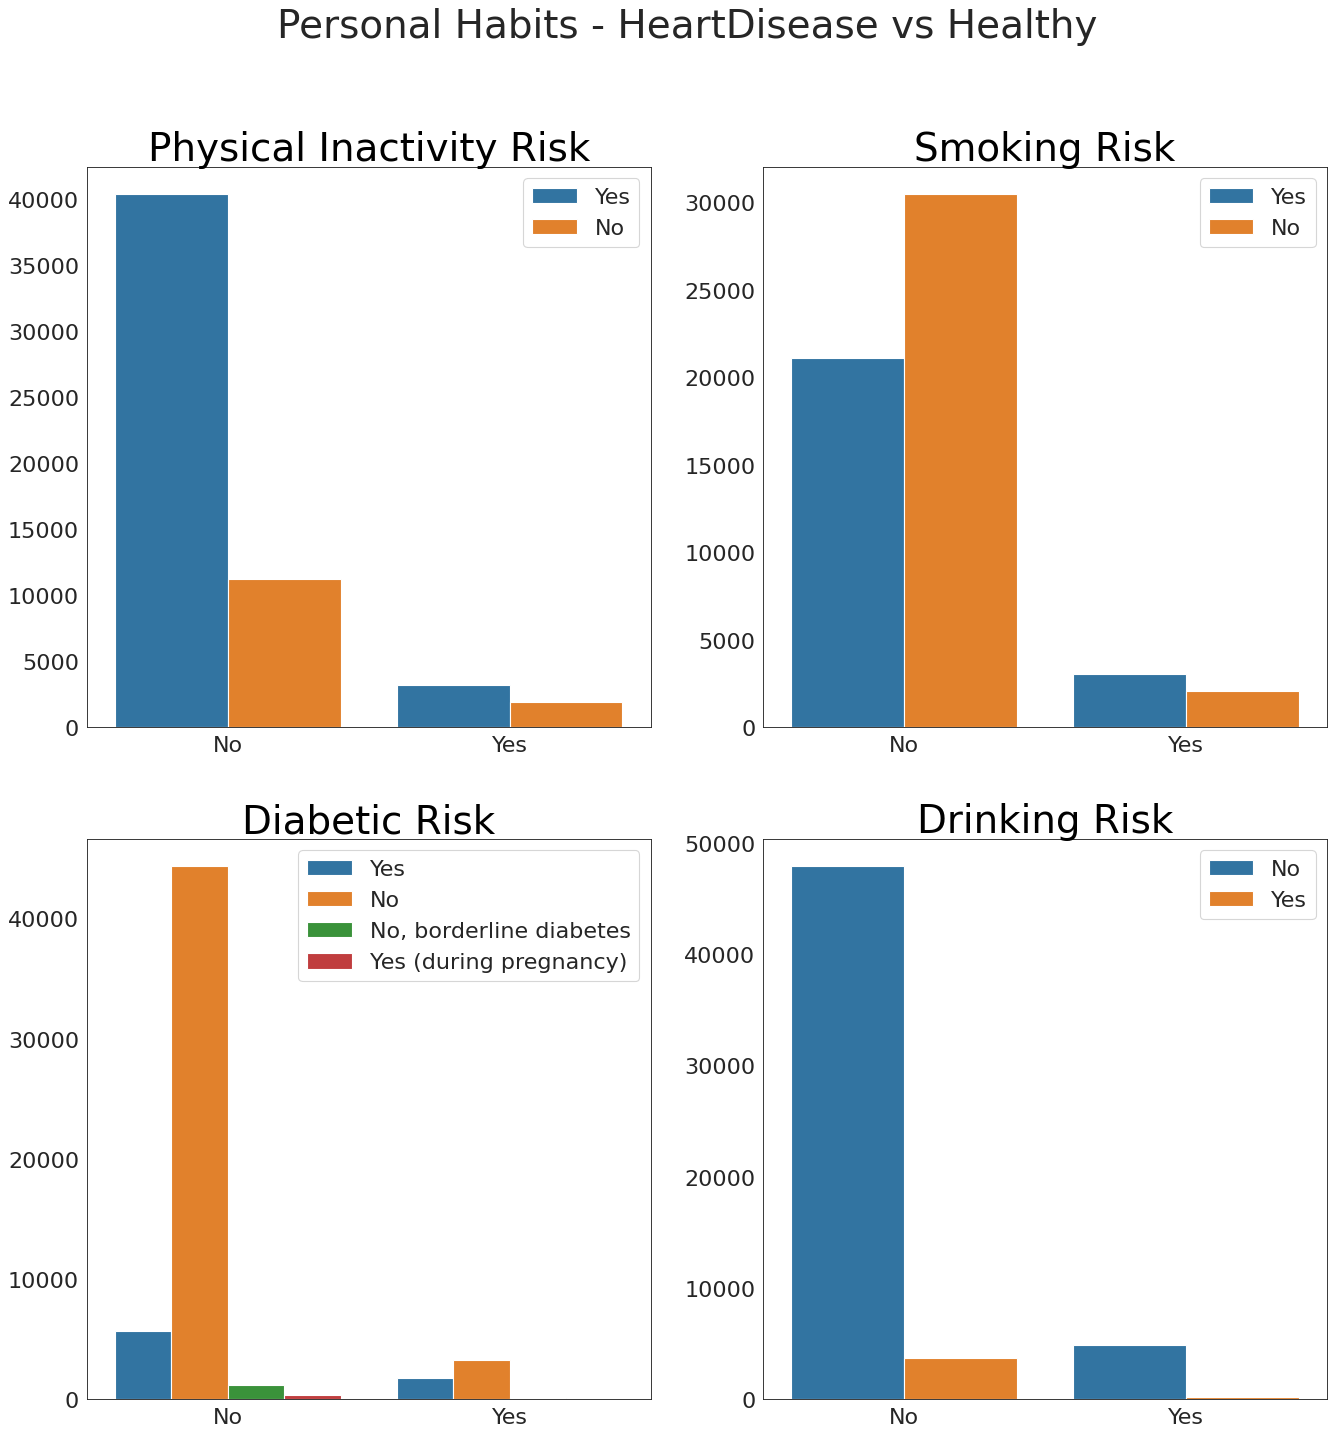

In [16]:
## Set the background color of the plot
sns.set_style("white")

## Create a figure with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20), dpi=80)

## Set the title font size and weight
title_args = {'font':'Sorts Mill Goudy','color': 'black', 'size':35}

## Plot 1: PhysicalActivity - HeartDisease
sns.countplot(data=df, x='HeartDisease', hue='PhysicalActivity', ax=axes[0, 0])
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')
axes[0, 0].set_title('Physical Inactivity Risk', **title_args)

## Plot 2: Smoking - HeartDisease
sns.countplot(data=df, x='HeartDisease', hue='Smoking', ax=axes[0, 1])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].set_title('Smoking Risk', **title_args)

## Plot 3: Diabetic - HeartDisease
sns.countplot(data=df, x='HeartDisease', hue='Diabetic', ax=axes[1, 0])
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')
axes[1, 0].set_title('Diabetic Risk', **title_args)

# Plot 4: AlcoholDrinking - HeartDisease
sns.countplot(data=df, x='HeartDisease', hue='AlcoholDrinking', ax=axes[1, 1])
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].set_title('Drinking Risk', **title_args)

## Remove the legend title
for ax in axes.flatten(): ## flatten used to get a copy of an given array collapsed into one dimension
    if ax.get_legend():
        ax.legend(title='Heart Disease', fontsize=20)
        ax.get_legend().set_title('')

# Set the tick label size
for ax in axes.flatten():
    ax.tick_params(axis='both', which='major', labelsize=20)

# Set the plot title
fig.suptitle('Personal Habits - HeartDisease vs Healthy', fontsize=35)

# Show the plot
plt.show()

- Smoking and the habit of not having physical acitivity will immensely increase the risk of having heart diseases.
- Meanwhile, drinking doesnot affect much on heart disease.


---



***e. Does skin cancer increase your risk of heart disease?***

Text(0.5, 1.0, 'Correlation between skin and heart diseases')

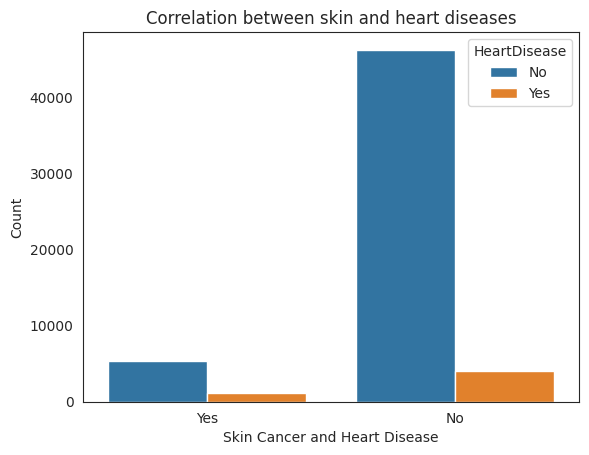

In [17]:
plt2 = sns.countplot(data=df, x='SkinCancer', hue='HeartDisease')
plt2.set_xlabel('Skin Cancer and Heart Disease')
plt2.set_ylabel('Count')
plt2.set_title('Correlation between skin and heart diseases')

- The people with skin cancer are at a slight higher risk to have heart diseases.

---



## **IV. Insight**
- 8 out of 100 people will have a risk of getting heart diseases
- The more you age, the higher chance you will get CVD
- CVD highest percentages are among Native American and the lowest are Asian
- Males are more prone to heart disease
- People with more frequent physical acitivity will be less likely to have CVD
- Less smoking will also reduce the risk
- Surprisingly, the people who drink alcohol tend not to have CVD.
- The people with diabetes, asthma and skin cancer are also in the slightly dangerous zone but not too significantly threatening.
- People having CVD tend to have a higher BMI index.
- People who have had a stroke before are more likely to develope heart diseases.

# Chapter 2
## **I. Data Cleaning**
#### a. Check missing values

In [18]:
## Divided categorical and numerical attributes
num_features = df.select_dtypes(include=np.number).columns
print(f'Numerical columns are: {num_features}')
print(f'Categorical columns are: {categorical_columns}')

Numerical columns are: Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')
Categorical columns are: ['AgeCategory', 'Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'Diabetic', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [19]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            1
PhysicalActivity    1
GenHealth           1
SleepTime           1
Asthma              1
KidneyDisease       1
SkinCancer          1
dtype: int64

In [20]:
for col in categorical_columns:
  print(df[col].unique())

['55-59' '>80' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54' '45-49'
 '18-24' '35-39' '30-34' '25-29']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No' nan]
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)' nan]
['No' 'Yes']
[ 3  0 20 28  6 15  5 30  7  1  2 21  4 10 14 18  8 25 16 29 27 17 24 12
 23 26 22 19  9 13 11]
[30  0  2  5 15  8  4  3 10 14 20  1  7 24  9 28 16 12  6 25 17 18 21 29
 22 13 23 27 26 11 19]
['No' 'Yes']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent' nan]
[ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. nan]
['Yes' 'No' nan]
['No' 'Yes' nan]
['Yes' 'No' nan]


- No missing values and all of them are valid

***b. Check for outliers and skewness***
- We already see some outliers in MentalHealth, PhysicalHealth, but we can examine the IQR to check the details of skewness.

In [21]:
for col in num_features:
  Q1, Q3 = df[col].quantile([0.25,0.75])
  IQR = Q3 - Q1
  right = Q3 + 1.5 * IQR
  left = Q1 - 1.5 * IQR
  n_outliers = ((df[col] < left) | (df[col] > right)).sum()
  percent_outliers = n_outliers * 100 / len(df)
  print(f"{col}:")
  print(f"\tOutlier Num = {n_outliers:,}")
  print(f"\tOutlier Percentage = {percent_outliers:.2f}%\n")

BMI:
	Outlier Num = 1,652
	Outlier Percentage = 2.91%

PhysicalHealth:
	Outlier Num = 9,083
	Outlier Percentage = 16.01%

MentalHealth:
	Outlier Num = 7,265
	Outlier Percentage = 12.80%

SleepTime:
	Outlier Num = 996
	Outlier Percentage = 1.76%



- By this point, we could see a more centre-focused histagram of the numerical features.

***c. Encoding cat_feature and scaling features***

In [34]:
bins = [0, 18.5, 25, 30, 35, np.inf]
names = ['Underweight (BMI < 18.5)', 'Normal weight (18.5 <= BMI < 25.0)', 'Overweight (25.0 <= BMI < 30.0)', 'Obese (30.0 <= BMI < 35.0)', 'Extremly Obese (BMI >= 35.0)']
df['BMI_Cat'] = pd.cut(df['BMI'], bins, labels=names)
df.drop('BMI',axis=1,inplace=True)

In [35]:
df.head(10)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_Cat
0,No,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes,Underweight (BMI < 18.5)
1,No,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No,Normal weight (18.5 <= BMI < 25.0)
2,No,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No,Overweight (25.0 <= BMI < 30.0)
3,No,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes,Normal weight (18.5 <= BMI < 25.0)
4,No,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No,Normal weight (18.5 <= BMI < 25.0)
5,Yes,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No,Overweight (25.0 <= BMI < 30.0)
6,No,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes,Normal weight (18.5 <= BMI < 25.0)
7,No,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No,Obese (30.0 <= BMI < 35.0)
8,No,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No,Overweight (25.0 <= BMI < 30.0)
9,No,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No,Extremly Obese (BMI >= 35.0)


In [36]:
from sklearn.compose import make_column_transformer
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

order_cols = ["BMI_Cat", "AgeCategory", "HeartDisease"]
noorder_cols = [ "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking",
            "Sex", "Race", "Diabetic", "PhysicalActivity",
            "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"]

# Label encoding
for col in order_cols:
    df[col] = preprocessing.LabelEncoder().fit_transform(df[col])

# One-hot encoding
for col in noorder_cols:
    dummy_col = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df, dummy_col], axis=1)
    del df[col]

***d. Train_Test split***
- I will use 80% for training and 20% for testing

In [24]:
from sklearn.feature_selection import f_classif, chi2
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.tree  import DecisionTreeClassifier

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 9.3 MB/s eta 0:00:00


In [37]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics

In [38]:
X = df.drop(columns=['HeartDisease'], axis=1)
y =  df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) # we get the same train,test sets across different executions with random_state = 42

* Let create 6 confusion matrixes using 6 different ML model, including: ***Decision Tree, Logistic Regression, Random Forest, AdaBoost Classifier, XGBClassifier, CatBoost***

In [39]:
# Let create a function so when we use different algo, it will appear in the same format
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

models = {
    "D_T":DecisionTreeClassifier(random_state = 42, max_depth=15),
    "Logistic": LogisticRegression(random_state = 42),
    "R_F":RandomForestClassifier(random_state = 42, max_depth=15),
    "Ada":AdaBoostClassifier(random_state=42),
    "XGB":XGBClassifier(random_state=42),
    "CatBoost":CatBoostClassifier(random_state=42, silent=True)
}

results = pd.DataFrame(columns=['Model', 'Train Score','Test Score','Recall','Precision','f1-score', 'Accuracy'])

def test_models(X_train, X_test, y_train, y_test):
    for model in models:
        fit = models[model].fit(X_train, y_train)
        y_pred = fit.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_title(model)
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', ax=ax)
        plt.show()
        train_score = round(fit.score(X_train, y_train),3)
        test_score = round(fit.score(X_test, y_test),3)
        recall = round(metrics.recall_score(y_test, fit.predict(X_test))*100,2)
        precision = round(metrics.precision_score(y_test, fit.predict(X_test))*100,2)
        f1 = round(metrics.f1_score(y_test, fit.predict(X_test))*100,2)
        accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
        results.loc[len(results.index)] = [model, train_score, test_score, recall, precision, f1, accuracy]

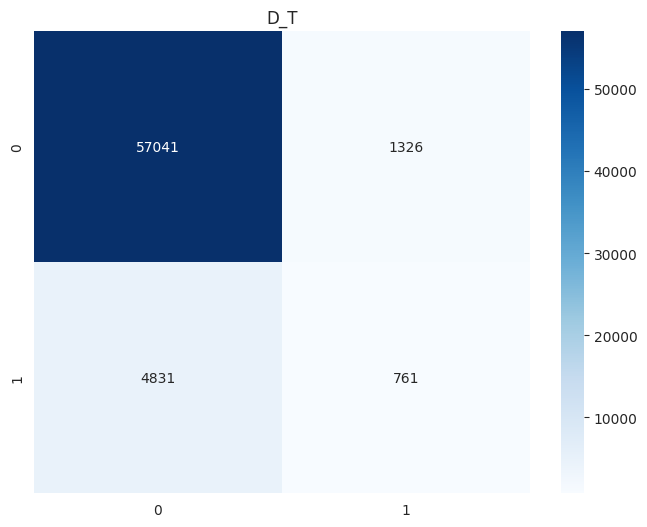

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


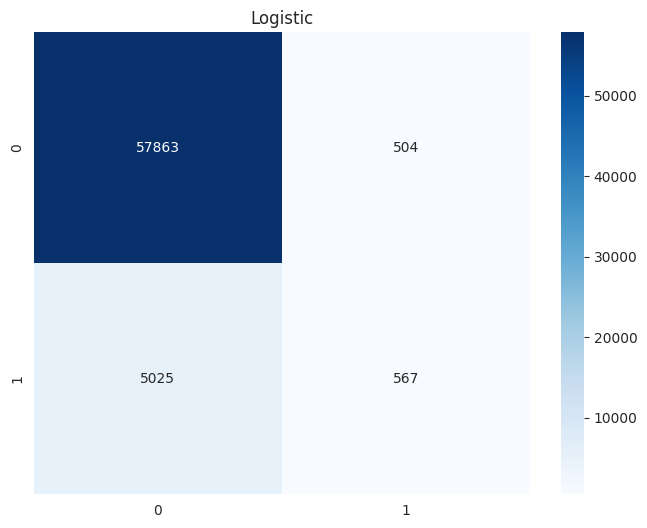

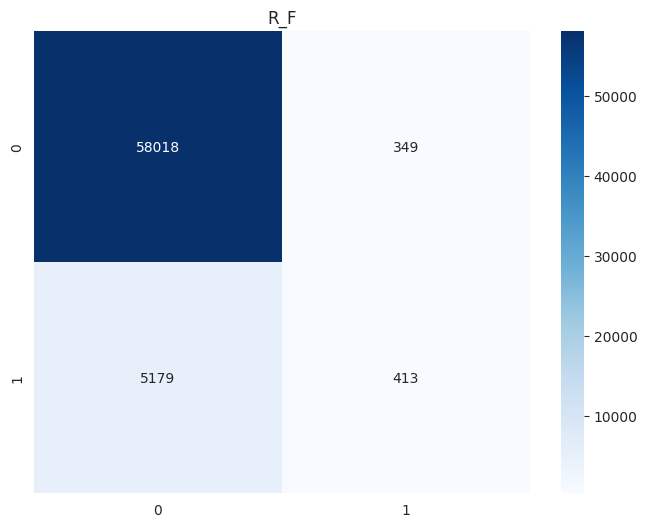

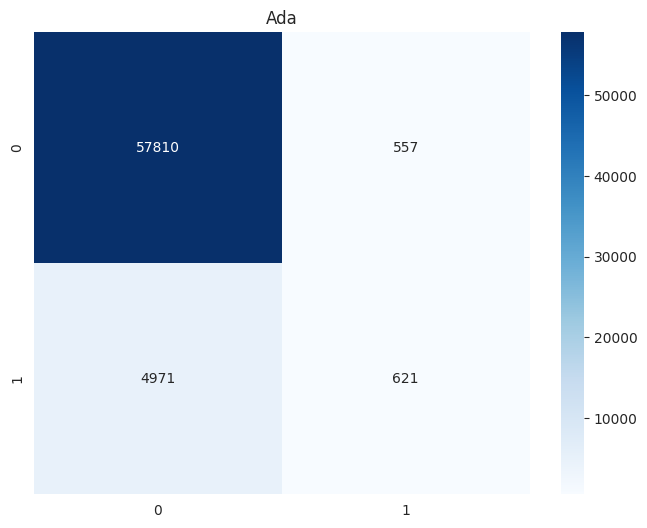

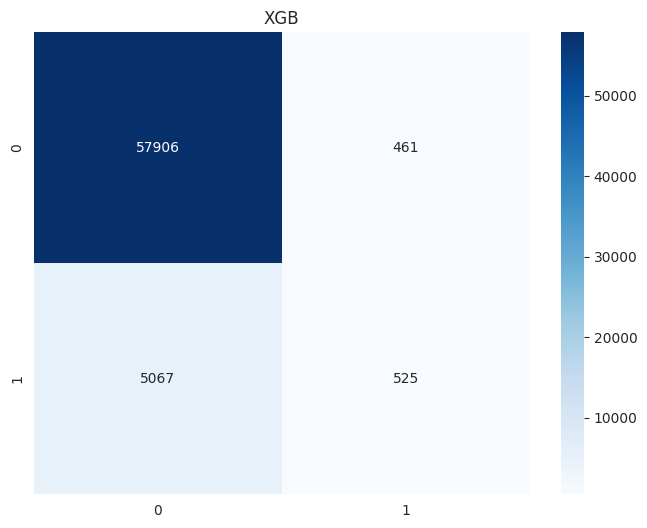

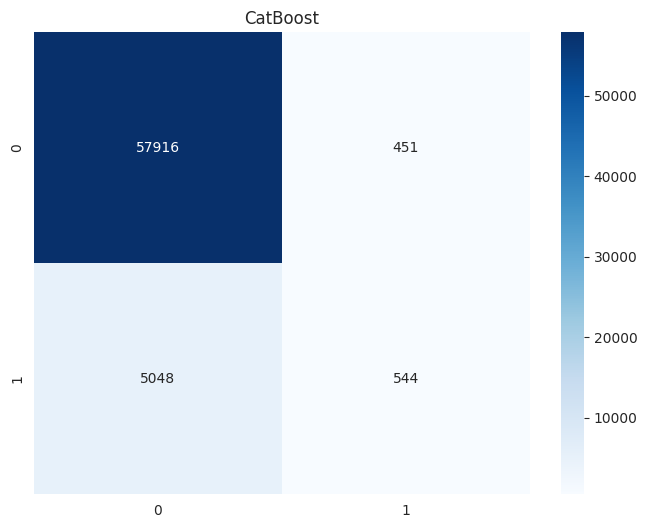

In [40]:
test_models(X_train, X_test, y_train, y_test)

In [41]:
results

,Model,Train Score,Test Score,Recall,Precision,f1-score,Accuracy
0,D_T,0.936,0.904,13.61,36.46,19.82,90.37
1,Logistic,0.916,0.914,10.14,52.94,17.02,91.36
2,R_F,0.932,0.914,7.39,54.20,13.00,91.36
3,Ada,0.916,0.914,11.11,52.72,18.35,91.36
4,XGB,0.922,0.914,9.39,53.25,15.96,91.36
5,CatBoost,0.925,0.914,9.73,54.67,16.52,91.40
